### VERSTAPPEN - RED BULL(P1) vs HAMILTON - MERCEDES(P2) vs NORRIS - MCLAREN(P3) 

- Race Pace Analysis 
- Qualifying Pace Analysis
- Sprint Shootout Analysis
- Sprint Shootout Qualifying Analysis 

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd


In [2]:
ff1.Cache.enable_cache('../cache')

##### Race Pace Analysis

In [10]:
YEAR = 2023
RACE = 18
SESSION = 'R'

session_qualifying = ff1.get_session(YEAR, RACE, SESSION)
session_qualifying.load()


events        ERROR 	Failed to access primary schedule backend. Falling back to Ergast! Reason: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /theOehrly/f1schedule/master/schedule_2023.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002ACB16D6EF0>, 'Connection to raw.githubusercontent.com timed out. (connect timeout=None)')))
core           INFO 	Loading data for United States Grand Prix - Race [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
core        WARNING 	Session results contain duplicate entries for driver(s) ['22']
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached

In [11]:
MAX, HAMILTON, NORRIS = 'VER', 'HAM', 'NOR'


In [16]:
laps = session_qualifying.laps

In [17]:
MAX_LAPS = laps.pick_driver(MAX)
HAM_LAPS = laps.pick_driver(HAMILTON)
NOR_LAPS = laps.pick_driver(NORRIS)


In [20]:
MAX_FASTEST = MAX_LAPS.pick_fastest()
HAM_FASTEST = HAM_LAPS.pick_fastest()
NOR_FASTEST = NOR_LAPS.pick_fastest()


In [21]:
MAX_CAR = MAX_FASTEST.get_car_data()
HAM_CAR = HAM_FASTEST.get_car_data()
NOR_CAR = NOR_FASTEST.get_car_data()


C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


In [22]:
from fastf1 import plotting


In [23]:
plotting.setup_mpl()


Text(0.5, 1.0, 'Speed, RPM, Throttle and Gear')

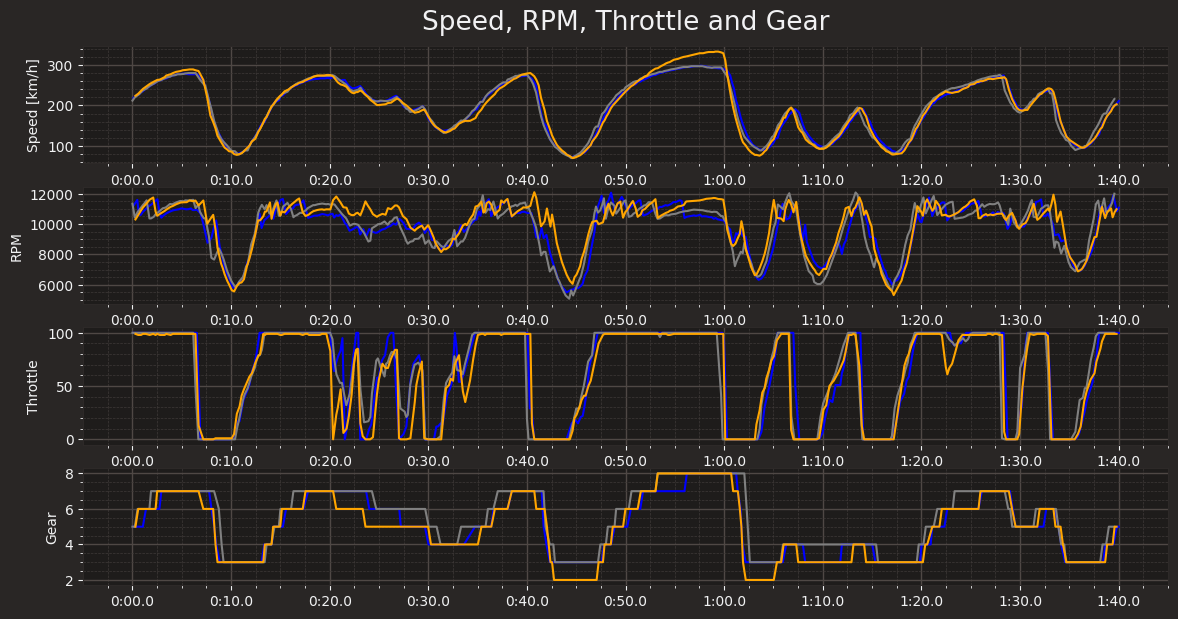

In [26]:
fig, ax = plt.subplots(4, figsize=(14, 7))

MAX_COLOR = "blue"
HAM_COLOR = "grey"
NOR_COLOR = "orange"

ax[0].plot(MAX_CAR['Time'], MAX_CAR['Speed'], color=MAX_COLOR)
ax[0].plot(HAM_CAR['Time'], HAM_CAR['Speed'], color=HAM_COLOR)
ax[0].plot(NOR_CAR['Time'], NOR_CAR['Speed'], color=NOR_COLOR)
ax[0].set_ylabel('Speed [km/h]')

ax[1].plot(MAX_CAR['Time'], MAX_CAR['RPM'], color=MAX_COLOR)
ax[1].plot(HAM_CAR['Time'], HAM_CAR['RPM'], color=HAM_COLOR)
ax[1].plot(NOR_CAR['Time'], NOR_CAR['RPM'], color=NOR_COLOR)
ax[1].set_ylabel('RPM')

ax[2].plot(MAX_CAR['Time'], MAX_CAR['Throttle'], color=MAX_COLOR)
ax[2].plot(HAM_CAR['Time'], HAM_CAR['Throttle'], color=HAM_COLOR)
ax[2].plot(NOR_CAR['Time'], NOR_CAR['Throttle'], color=NOR_COLOR)
ax[2].set_ylabel('Throttle')

ax[3].plot(MAX_CAR['Time'], MAX_CAR['nGear'], color=MAX_COLOR)
ax[3].plot(HAM_CAR['Time'], HAM_CAR['nGear'], color=HAM_COLOR)
ax[3].plot(NOR_CAR['Time'], NOR_CAR['nGear'], color=NOR_COLOR)
ax[3].set_ylabel('Gear')

ax[0].set_title('Speed, RPM, Throttle and Gear')


#### LAP BY LAP ANALYSIS - **NOR** VS **HAM** AND **VER** VS **NOR**

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25196\88293562.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  HAM_LAP_NUMBERS = HAM_LAP_NUMBERS[:len(HAM_LAP_TIMES)]
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25196\88293562.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  NOR_LAP_NUMBERS = NOR_LAP_NUMBERS[:len(NOR_LAP_TIMES)]
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25196\88293562.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated.

Text(0.5, 0.98, 'HAM vs NOR vs VER - Pitstops EXCLUDED')

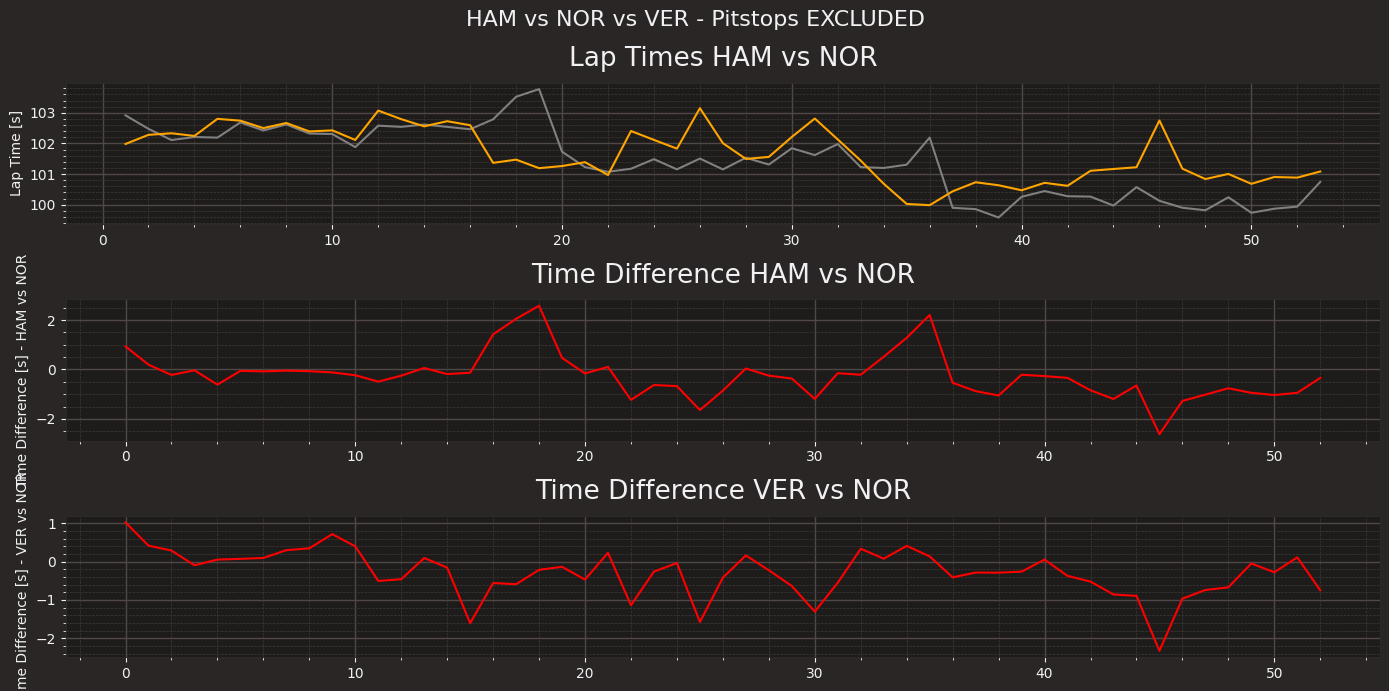

In [115]:
HAM_LAP_TIMES = HAM_LAPS['LapTime'].dt.total_seconds()
NOR_LAP_TIMES = NOR_LAPS['LapTime'].dt.total_seconds()
VER_LAP_TIMES = MAX_LAPS['LapTime'].dt.total_seconds()

RED_COLOR = '#FF0000'

HAM_LAP_NUMBERS = HAM_LAPS['LapNumber']
NOR_LAP_NUMBERS = NOR_LAPS['LapNumber']
VER_LAP_NUMBERS = MAX_LAPS['LapNumber']

HAM_LAP_TIMES = HAM_LAP_TIMES[HAM_LAP_TIMES < 110]
NOR_LAP_TIMES = NOR_LAP_TIMES[NOR_LAP_TIMES < 110]
VER_LAP_TIMES = VER_LAP_TIMES[VER_LAP_TIMES < 110]

HAM_LAP_NUMBERS = HAM_LAP_NUMBERS[:len(HAM_LAP_TIMES)]
NOR_LAP_NUMBERS = NOR_LAP_NUMBERS[:len(NOR_LAP_TIMES)]
HAM_LAP_TIMES = HAM_LAP_TIMES[:len(HAM_LAP_NUMBERS)]
NOR_LAP_TIMES = NOR_LAP_TIMES[:len(NOR_LAP_NUMBERS)]

fig, ax = plt.subplots(3, figsize=(14, 7))
ax[0].plot(HAM_LAP_NUMBERS, HAM_LAP_TIMES, color=HAM_COLOR)
ax[0].plot(NOR_LAP_NUMBERS, NOR_LAP_TIMES, color=NOR_COLOR)
ax[0].set_ylabel('Lap Time [s]')
ax[0].set_title('Lap Times HAM vs NOR')

HAM_LAP_TIMES_SECONDS = HAM_LAP_TIMES
NOR_LAP_TIMES_SECONDS = NOR_LAP_TIMES
VER_LAP_TIMES_SECONDS = VER_LAP_TIMES

HAM_LAP_TIMES_SECONDS.index = range(len(HAM_LAP_TIMES_SECONDS))
NOR_LAP_TIMES_SECONDS.index = range(len(NOR_LAP_TIMES_SECONDS))
VER_LAP_TIMES_SECONDS.index = range(len(VER_LAP_TIMES_SECONDS))

time_difference = HAM_LAP_TIMES_SECONDS - NOR_LAP_TIMES_SECONDS
time_difference = time_difference[time_difference < 10]
time_difference = time_difference[time_difference > -10]

ax[1].plot(time_difference, color=RED_COLOR)
ax[1].set_ylabel('Time Difference [s] - HAM vs NOR')
ax[1].set_title('Time Difference HAM vs NOR')

time_difference = VER_LAP_TIMES_SECONDS - NOR_LAP_TIMES_SECONDS
time_difference = time_difference[time_difference < 10]
time_difference = time_difference[time_difference > -10]

ax[2].plot(time_difference, color=RED_COLOR)
ax[2].set_ylabel('Time Difference [s] - VER vs NOR')
ax[2].set_title('Time Difference VER vs NOR')

fig.suptitle('HAM vs NOR vs VER - Pitstops EXCLUDED', fontsize=16)


- Verstappen was the fastest driver on the track with an average lap time of 1:23.7
- Hamilton was the second fastest driver on the track with an average lap time of 1:23.8
- Norris was the third fastest driver on the track with an average lap time of 1:24.1

In [135]:
# find avg of ham, nor and ver and convert it to minutes and seconds format like 1:30.000 rounded to 3 decimal places

HAM_AVG = HAM_LAP_TIMES_SECONDS.mean()
NOR_AVG = NOR_LAP_TIMES_SECONDS.mean()
VER_AVG = VER_LAP_TIMES_SECONDS.mean()

HAM_AVG = pd.to_datetime(HAM_AVG, unit='s').strftime("%M:%S.%f")
NOR_AVG = pd.to_datetime(NOR_AVG, unit='s').strftime("%M:%S.%f")
VER_AVG = pd.to_datetime(VER_AVG, unit='s').strftime("%M:%S.%f")

print("Lewis Hamilton's Avg Lap Time(s) excluding Pitstops: ", HAM_AVG + "s")
print("Lando Norris's Avg Lap Time(s) excluding Pitstops: ", NOR_AVG + "s")
print("Max Verstappen's Avg Lap Time(s) excluding Pitstops: ", VER_AVG + "s")


Lewis Hamilton's Avg Lap Time(s) excluding Pitstops:  01:41.418358s
Lando Norris's Avg Lap Time(s) excluding Pitstops:  01:41.662867s
Max Verstappen's Avg Lap Time(s) excluding Pitstops:  01:41.376566s


#### RACE STRATEGY ANALYSIS - ALL DRIVERS


In [29]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()


In [44]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(['Driver', 'Stint'])

In [41]:

compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#FFFFFF',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}


In [61]:
drivers_abb = laps['Driver'].unique()


array(['VER', 'NOR', 'SAI', 'PER', 'RUS', 'GAS', 'STR', 'TSU', 'ALB',
       'SAR', 'HUL', 'BOT', 'ZHO', 'MAG', 'RIC', 'ALO', 'PIA', 'OCO',
       'HAM', 'LEC'], dtype=object)

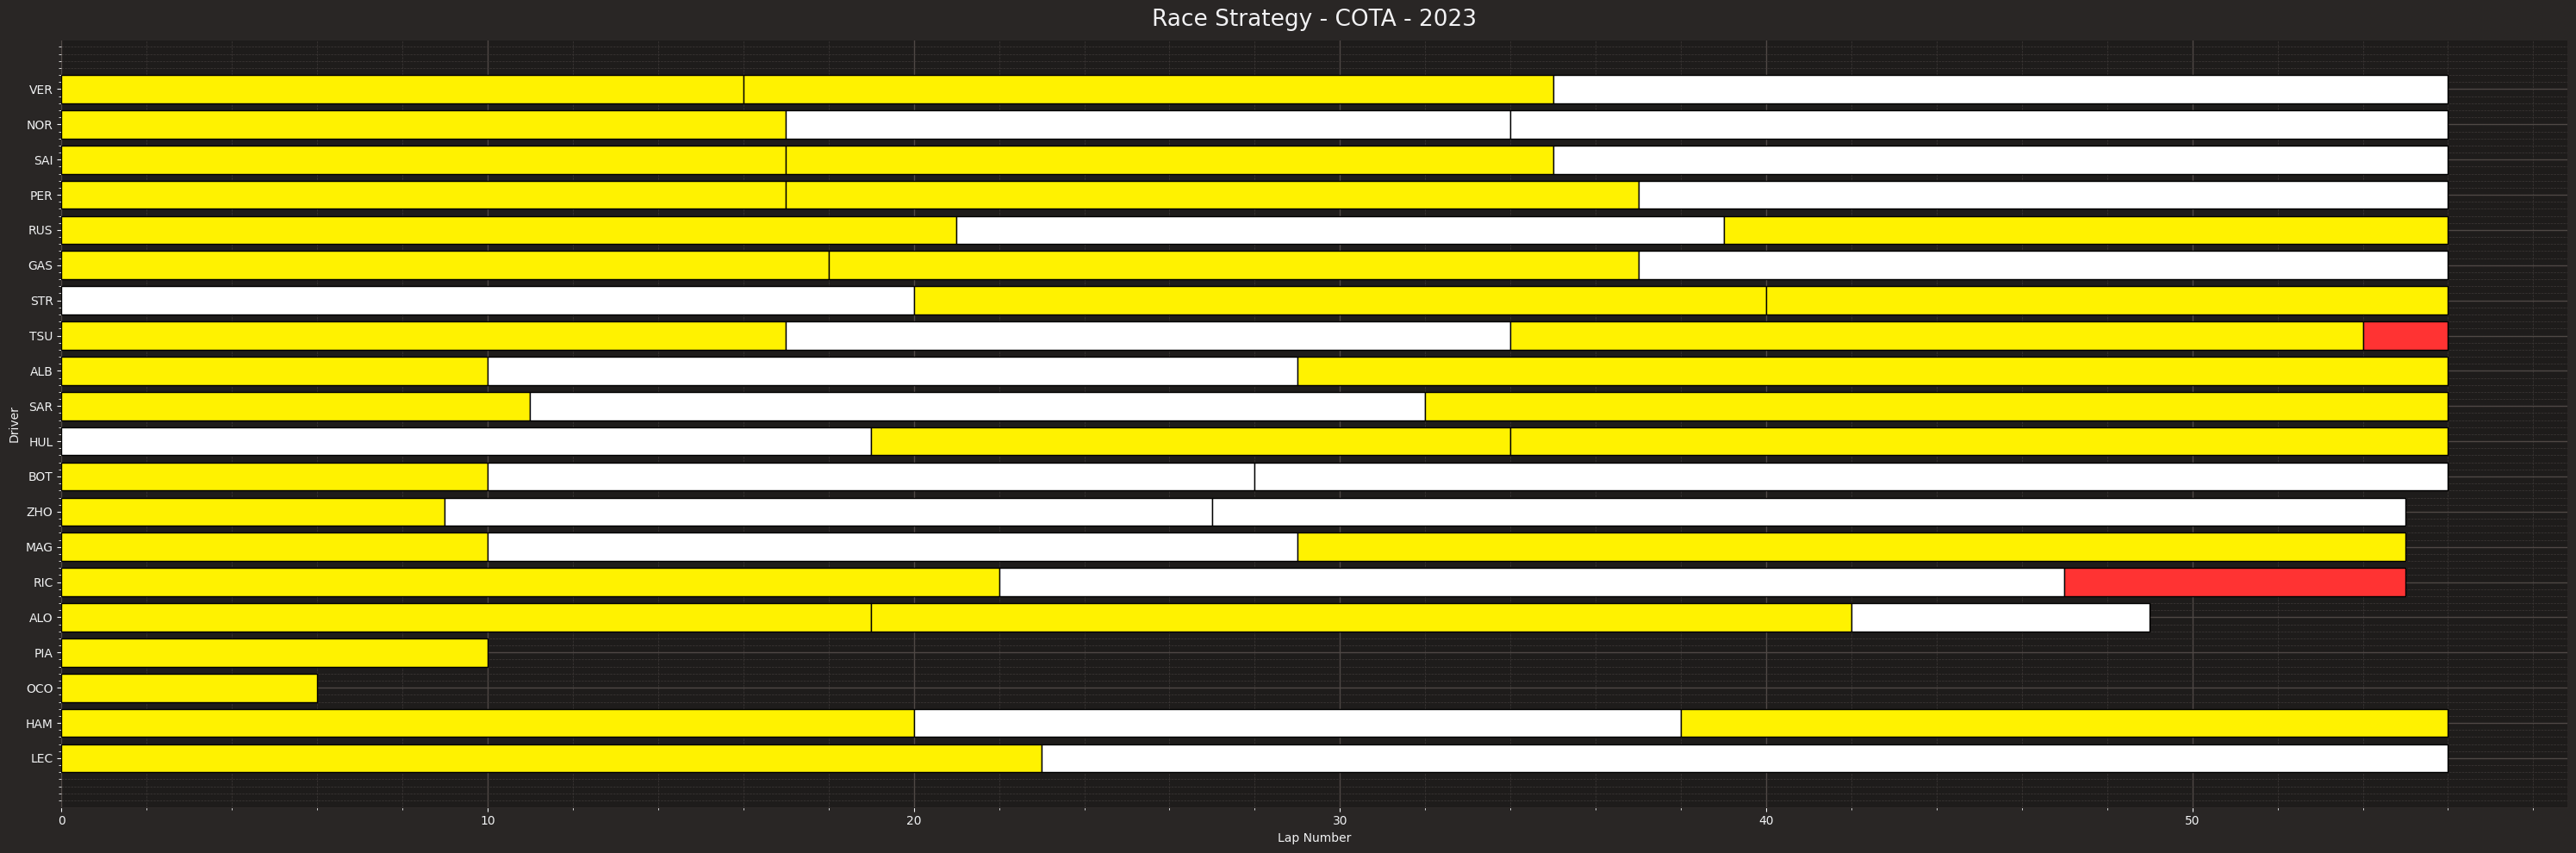

In [62]:

plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()


for driver in drivers_abb:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]

    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver],
            stint['StintLength'],
            left=previous_stint_end,
            color=compound_colors[stint['Compound']],
            edgecolor='black',
        )

        previous_stint_end += stint['StintLength']

plt.title(f'Race Strategy - COTA - {YEAR}')
plt.xlabel('Lap Number')
plt.ylabel('Driver')
plt.gca().invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()